In [51]:
from pandas import read_csv
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [37]:
dataset = read_csv("C:/Users/Raeni/PycharmProjects/Spring2025/DSC630/Dataset/als_data.csv")
dataset.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


In [39]:
dataset.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


In [40]:
dataset.isnull().sum()

ID                 0
Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
                  ..
trunk_min          0
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
Length: 101, dtype: int64

In [41]:
# dropping ID and SubjectID features
dataset = dataset.drop(columns = ["ID","SubjectID"])

In [42]:
# Apply a standard scalar to the data.
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)

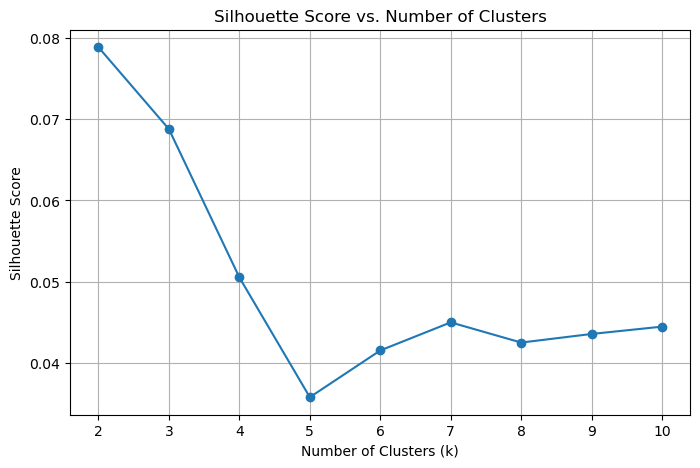

'\nI have chosen 2 clusters as it has highest silhouette score, all subsequent increases show significant drops in score \n'

In [67]:
# Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
cluster_range = range(2, 11)
CS = []

# get silhouette score of clusters from 2-11
for _ in cluster_range:
    kmeans = KMeans(n_clusters=_, random_state=0)
    label = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, label)
    CS.append(score)

# plot cluster score to determine the most suitable number of clusters 
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, CS, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid()
plt.show()

# Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

"""
I have chosen 2 clusters as it has highest silhouette score, all subsequent increases show significant drops in score, we could use 3 as well since it has a high score to better visualize more separation
"""

In [86]:
# Fit a K-means model to the data with the optimal number of clusters chosen 

kmeans = KMeans(n_clusters=2, random_state=0)
clusters_nums = kmeans.fit_predict(scaled_data)

In [87]:
# Fit a PCA transformation with two features to the scaled data
pca = PCA(n_components=2, random_state=0)
df_pca = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(df_pca, columns=["PCA1","PCA2"])

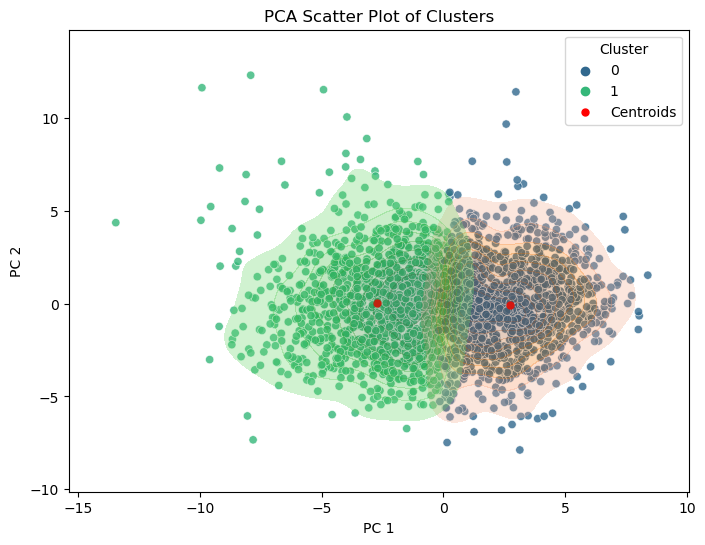

In [88]:
# Make a scatterplot the PCA transformed data coloring each point by its cluster value

# plot points 
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
df_pca['Cluster'] = clusters_nums
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=clusters_nums, palette='viridis', alpha=0.8)

# plot cluster center 
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
            s=100, c='red', marker='.', label='Centroids')

# plot area of cluster
for cluster in list(set(clusters_nums)):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    sns.kdeplot(
        x=cluster_data['PCA1'],
        y=cluster_data['PCA2'],
        fill=True,
        alpha=0.3,
        levels=10,
    )


plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Scatter Plot of Clusters')
plt.legend(title="Cluster")
plt.show()

In [ ]:
"""
Summarize your results and make a conclusion

The dataset was scaled using a standard scaler and some columns have been removed which contains the ID of the patient. Based on the given dataset I have chosen to use 2 clusters as it has highest silhouette score as it will provide better clustering results. Using a higher number of clusters may indicate datapoints might overlap or may be poorly separated. 
PCA was done to reduce high feature count to 2 principal components which captured the majority of the variance.
After PCA was done, visualization of the clusters was performed based on the PCA, plotting of cluster centers and clsuter area.
In conclusion K-means partitioned the data into 2 separate clusters based on the PCA results.
"""